# MNIST DATASET MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('/home/sudhanshu/projects/personal/python/ML/Datasets/MNIST_Dataset/train.csv')

In [3]:
# dataset rows and cols
df.shape

(42000, 785)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
# taking only first 10000 rows
df = df[:10000]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 59.9 MB


In [7]:
df.shape

(10000, 785)

In [8]:
#to see first 10 rows only
df.head(10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   
5       0    ...            0         0         0         0         0   
6       0    ...            0         0         0         0         0   
7       0    ...            0         0         0         0         0   
8       0    ...            0         0         0         0         0   
9       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  
5         0         0         0         0         0  
6         0         0         0         0         0  
7         0         0         0         0         0  
8         0         0         0         0         0  
9         0         0         0         0         0  

[10 rows x 785 columns]

In [9]:
# X is the input features
X = df.drop(['label'], axis=1)

In [10]:
# y is the output labels
y = df['label']

In [11]:
# see first 5 rows of X
X.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 784 columns]

In [12]:
# first 5 values of y
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

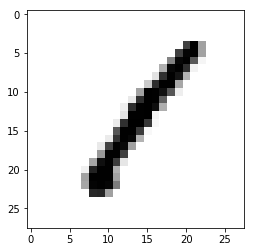

In [13]:
# using matplotlib to plot the first row
plt.imshow(df.values[0][1:].reshape(28,28), cmap='binary')

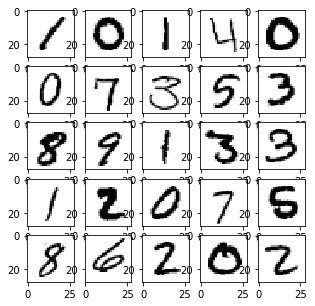

In [14]:
# plotting the first 25 rows
r = 5
c = 5
t = r*c
fig = plt.figure(figsize=(r,c))

for i in range(0,t):
    pic = df.values[i][1:].reshape(28,28)
    fig.add_subplot(r,c,i+1)
    plt.imshow(pic, cmap='binary')
plt.show()

In [44]:
# to split X and y is training and testing sets
from sklearn.model_selection import train_test_split

In [45]:
# to get accuracy and recall measures
from sklearn.metrics import classification_report

In [46]:
# random state defines the jumbling seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Without Pre Processing

### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
#make model object
model_nb = GaussianNB()

In [49]:
# train the model
model_nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [50]:
# predict the labels X_test
model_nb_pred = model_nb.predict(X_test)

In [51]:
# check metrics
print(classification_report(y_test,model_nb_pred))

             precision    recall  f1-score   support

          0       0.71      0.89      0.79       314
          1       0.75      0.95      0.84       367
          2       0.76      0.15      0.25       369
          3       0.62      0.63      0.62       322
          4       0.87      0.39      0.54       319
          5       0.61      0.09      0.15       310
          6       0.58      0.94      0.72       314
          7       0.92      0.26      0.41       360
          8       0.40      0.57      0.47       308
          9       0.38      0.94      0.54       317

avg / total       0.67      0.58      0.53      3300



### Decision Trees

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
# limit the depth for easy computations
model_dt = DecisionTreeClassifier(max_depth=20)

In [54]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
model_dt_pred = model_dt.predict(X_test)

In [56]:
print(classification_report(y_test, model_dt_pred))

             precision    recall  f1-score   support

          0       0.85      0.91      0.88       314
          1       0.90      0.92      0.91       367
          2       0.85      0.78      0.81       369
          3       0.76      0.75      0.75       322
          4       0.79      0.79      0.79       319
          5       0.75      0.70      0.73       310
          6       0.85      0.86      0.85       314
          7       0.82      0.85      0.84       360
          8       0.74      0.68      0.71       308
          9       0.72      0.80      0.76       317

avg / total       0.81      0.81      0.81      3300



In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model_lg = LogisticRegression()

In [59]:
model_lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
model_lg_pred = model_lg.predict(X_test)

In [61]:
print(classification_report(y_test, model_lg_pred))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       314
          1       0.94      0.97      0.95       367
          2       0.92      0.85      0.89       369
          3       0.84      0.87      0.85       322
          4       0.86      0.88      0.87       319
          5       0.86      0.78      0.82       310
          6       0.94      0.95      0.94       314
          7       0.92      0.89      0.90       360
          8       0.84      0.86      0.85       308
          9       0.80      0.84      0.82       317

avg / total       0.89      0.89      0.89      3300



In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
model_knn = KNeighborsClassifier()

In [64]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [65]:
model_knn_pred = model_knn.predict(X_test)

In [66]:
print(classification_report(y_test, model_knn_pred))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       314
          1       0.92      0.99      0.95       367
          2       0.99      0.93      0.96       369
          3       0.93      0.93      0.93       322
          4       0.97      0.90      0.93       319
          5       0.97      0.92      0.94       310
          6       0.97      0.98      0.97       314
          7       0.95      0.95      0.95       360
          8       0.96      0.89      0.93       308
          9       0.85      0.94      0.89       317

avg / total       0.94      0.94      0.94      3300



In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
model_nn = MLPClassifier(hidden_layer_sizes=(15,15), max_iter=200, random_state=42)

In [69]:
model_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [70]:
model_nn_pred = model_nn.predict(X_test)

In [71]:
print(classification_report(y_test, model_nn_pred))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94       314
          1       0.93      0.97      0.95       367
          2       0.93      0.88      0.90       369
          3       0.86      0.87      0.87       322
          4       0.90      0.90      0.90       319
          5       0.89      0.86      0.87       310
          6       0.94      0.93      0.94       314
          7       0.90      0.90      0.90       360
          8       0.88      0.86      0.87       308
          9       0.84      0.88      0.86       317

avg / total       0.90      0.90      0.90      3300



### Run all the algorithms again after running the cell at bottom to see change in metrics, starting from train_test_split

In [43]:
X[X>0] = 1